## installing the dependencies.

In [ ]:
pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
pip install tensorflow-gpu


  Using cached tensorflow_gpu-2.10.1-cp38-cp38-win_amd64.whl (455.9 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached protobuf-3.19.6-cp38-cp38-win_amd64.whl (896 kB)
     ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00
  Using cached wrapt-1.14.1-cp38-cp38-win_amd64.whl (35 kB)
  Using cached grpcio-1.50.0-cp38-cp38-win_amd64.whl (3.7 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
     ---------------------------------------- 5.9/5.9 MB 4.9 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
  Using cached h5py-3.7.0-cp38-cp38-win_amd64.whl (2.6 MB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached termcolor-2.1.1-py3-none-


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


list of all the installed packages in the system.

In [5]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asgiref                      3.5.2
asttokens                    2.0.8
astunparse                   1.6.3
async-generator              1.10
attrs                        22.1.0
Babel                        2.10.3
backcall                     0.2.0
backports.zoneinfo           0.2.1
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.2.0
caer                         2.0.8
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
colorama                     0.4.5
cycler                       0.11.0
debugpy                      1.6.3
decorator                    5.1.1
defusedxml                   0.7.1
Django                       4.1.2
entrypoints                  0.4
exce


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## imports

In [1]:
import tensorflow as tf
import os 
import pandas as pd

## cpu config

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU') # thias prevent the tensor flow from taking all of the memory
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
cpus = tf.config.experimental.list_physical_devices('CPU') # thias prevent the tensor flow from taking all of the memory

In [7]:
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Planning

if we train one model we'll have to classify  52 cards + 1 joker  cards.
this results in 53 classes.
therefore we'll train two models - one for finding the number on the card and one for finding the shape on the card.

## reading the data

In [77]:
df = pd.read_csv('./Training_set.csv')
df.head()
df_face_split = df.loc[:, 'label'][0].split()
print('number: ', df_face_split[0], ';  face: ', df_face_split[2])
number_on_Card_list = [i.split()[0] for i in df.loc[:, 'label']]


number:  six ;  face:  clubs


In [90]:
face_on_Card_list = [len(i.split()) for i in df.loc[:, 'label']]
counts = pd.DataFrame({'counts': face_on_Card_list})
counts['counts'].size

4776

In [207]:
counts # this is how i found there are joker cards thAT PRODUCE SPLIT LIST WITH LENGTH 1.

,counts
0,3
1,3
2,3
3,3
4,3
...,...
4771,3
4772,3
4773,3
4774,3


we can note that when the card is joker then the len of the card_split is 1 so we need to define a function to specifically handle this.

In [99]:
df.loc[:,['label']][df['label']=='joker']

,label
34,joker
200,joker
229,joker
259,joker
353,joker
...,...
4574,joker
4592,joker
4598,joker
4646,joker


In [97]:
def find_card_face(card):
    card_split = card.split()
    if(len(card_split) == 1):
         return card_split[0]
    else:
        return card_split[2]


face_on_Card_list = [find_card_face(card) for card in df.loc[:, 'label']]
face_on_Card_list


['clubs',
 'hearts',
 'diamonds',
 'spades',
 'spades',
 'hearts',
 'spades',
 'diamonds',
 'clubs',
 'spades',
 'clubs',
 'clubs',
 'clubs',
 'diamonds',
 'clubs',
 'diamonds',
 'diamonds',
 'hearts',
 'clubs',
 'spades',
 'diamonds',
 'diamonds',
 'hearts',
 'diamonds',
 'spades',
 'hearts',
 'spades',
 'spades',
 'hearts',
 'spades',
 'spades',
 'diamonds',
 'diamonds',
 'diamonds',
 'joker',
 'clubs',
 'clubs',
 'hearts',
 'spades',
 'spades',
 'spades',
 'clubs',
 'clubs',
 'hearts',
 'spades',
 'diamonds',
 'spades',
 'diamonds',
 'spades',
 'diamonds',
 'spades',
 'hearts',
 'hearts',
 'clubs',
 'hearts',
 'spades',
 'hearts',
 'diamonds',
 'clubs',
 'spades',
 'spades',
 'spades',
 'hearts',
 'diamonds',
 'diamonds',
 'diamonds',
 'diamonds',
 'clubs',
 'clubs',
 'clubs',
 'clubs',
 'diamonds',
 'hearts',
 'diamonds',
 'spades',
 'spades',
 'diamonds',
 'diamonds',
 'spades',
 'clubs',
 'diamonds',
 'spades',
 'diamonds',
 'clubs',
 'hearts',
 'hearts',
 'diamonds',
 'spades',


In [70]:
number_on_Card_list

['six',
 'queen',
 'seven',
 'six',
 'eight',
 'king',
 'ten',
 'jack',
 'three',
 'queen',
 'jack',
 'six',
 'eight',
 'seven',
 'eight',
 'two',
 'queen',
 'jack',
 'seven',
 'seven',
 'six',
 'jack',
 'ten',
 'queen',
 'six',
 'jack',
 'nine',
 'ten',
 'seven',
 'eight',
 'ace',
 'six',
 'four',
 'ten',
 'joker',
 'six',
 'nine',
 'five',
 'three',
 'four',
 'six',
 'ten',
 'seven',
 'jack',
 'seven',
 'six',
 'king',
 'six',
 'two',
 'nine',
 'two',
 'seven',
 'nine',
 'ten',
 'nine',
 'king',
 'queen',
 'ace',
 'eight',
 'queen',
 'seven',
 'ace',
 'five',
 'six',
 'two',
 'jack',
 'seven',
 'seven',
 'two',
 'ace',
 'five',
 'ace',
 'two',
 'four',
 'five',
 'ten',
 'nine',
 'seven',
 'two',
 'seven',
 'three',
 'five',
 'queen',
 'seven',
 'two',
 'jack',
 'two',
 'three',
 'eight',
 'nine',
 'jack',
 'jack',
 'five',
 'nine',
 'six',
 'nine',
 'jack',
 'king',
 'five',
 'ace',
 'six',
 'queen',
 'jack',
 'jack',
 'five',
 'five',
 'ten',
 'nine',
 'six',
 'eight',
 'six',
 'two

In [98]:
df_copy = df
df_copy['number_on_card'] = number_on_Card_list
df_copy['face_on_card'] = face_on_Card_list
df
# now  we have two 

,filename,label,number_on_card,face_on_card
0,Image_1.jpg,six of clubs,six,clubs
1,Image_2.jpg,queen of hearts,queen,hearts
2,Image_3.jpg,seven of diamonds,seven,diamonds
3,Image_4.jpg,six of spades,six,spades
4,Image_5.jpg,eight of spades,eight,spades
...,...,...,...,...
4771,Image_4772.jpg,ace of clubs,ace,clubs
4772,Image_4773.jpg,jack of hearts,jack,hearts
4773,Image_4774.jpg,five of clubs,five,clubs
4774,Image_4775.jpg,two of clubs,two,clubs


In [100]:
df['face_on_card'].value_counts()

spades      1255
clubs       1168
diamonds    1142
hearts      1130
joker         81
Name: face_on_card, dtype: int64

In [105]:
count_list = df['number_on_card'].value_counts()
type(count_list).to_dict

<function pandas.core.series.Series.to_dict(self, into: 'type[dict]' = <class 'dict'>) -> 'dict'>

the data provides us with the  label (target variable -> card face) and name of the file contianing the image.

In [38]:
import cv2 as cv
import imghdr
import matplotlib.pyplot as plt

In [14]:
os.listdir('./data')
data_dir = './data'

(224, 224, 3)


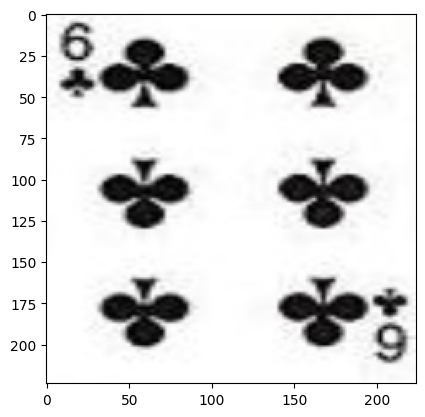

In [32]:
# list_of_imgs = os.listdir('./data/train')
img = cv.imread('./data/train/Image_1.jpg')
print(img.shape)
plt.imshow(img)


Therefore the data that we're working with are RGB(three channels) 255x244 pixel images. 

*IGNORE THE FOLLOWING CODE BLOCK*

In [ ]:
# for image_class in os.listdir(data_dir):
#     for image in os.listir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try:
#             img = cv.imread(image_path)
#             p
            
            



this provides you with somwdata pipline that helps you to work with large ammounts of data. 

In [34]:
tf.data.Dataset??


Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(collections_abc.Iterable, tracking_base.Trackable,
                composite_tensor.CompositeTensor):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(), dtype=int32)

  To process lines from files, use 

In [35]:
import numpy as np
from matplotlib import pyplot as plt

In [39]:
data = tf.keras.utils.image_dataset_from_directory('./data')

Found 6824 files belonging to 2 classes.


note: you can not direcly use index like a list  in the above data object. so you need to use the as_numpy_iterator().

In [40]:
type(data)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [42]:
data_iterator = data.as_numpy_iterator()
type(data_iterator)

tensorflow.python.data.ops.dataset_ops._NumpyIterator

In [44]:
batch = data_iterator.next()
batch

(array([[[[2.2100000e+02, 2.2300000e+02, 2.1200000e+02],
          [2.2100000e+02, 2.2300000e+02, 2.1200000e+02],
          [2.2031250e+02, 2.2231250e+02, 2.1131250e+02],
          ...,
          [2.2956250e+02, 2.3056250e+02, 2.2318750e+02],
          [2.4606250e+02, 2.4687500e+02, 2.4106250e+02],
          [2.5500000e+02, 2.5500000e+02, 2.5000000e+02]],
 
         [[2.1937500e+02, 2.2137500e+02, 2.1037500e+02],
          [2.1805469e+02, 2.2005469e+02, 2.0905469e+02],
          [2.1650391e+02, 2.1850391e+02, 2.0750391e+02],
          ...,
          [2.2153906e+02, 2.2253906e+02, 2.1516406e+02],
          [2.3575391e+02, 2.3671875e+02, 2.3075391e+02],
          [2.4931250e+02, 2.5012500e+02, 2.4431250e+02]],
 
         [[2.1762500e+02, 2.2031250e+02, 2.1068750e+02],
          [2.1600000e+02, 2.1868750e+02, 2.0906250e+02],
          [2.1519531e+02, 2.1788281e+02, 2.0731250e+02],
          ...,
          [2.1749609e+02, 2.1849609e+02, 2.1206641e+02],
          [2.2851953e+02, 2.2951953e+

In [48]:
print(len(batch))  # this is 2 coz there are the images and the labels.
batch[0].shape
# therefore each batch has 32 image

2


(32, 256, 256, 3)

In [110]:
batch = data_iterator.next()

In [111]:
batch[1]

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [138]:
def get_image(path, filename):
    img = cv.imread(os.path.join(path, filename))
    return img

TypeError: only size-1 arrays can be converted to Python scalars

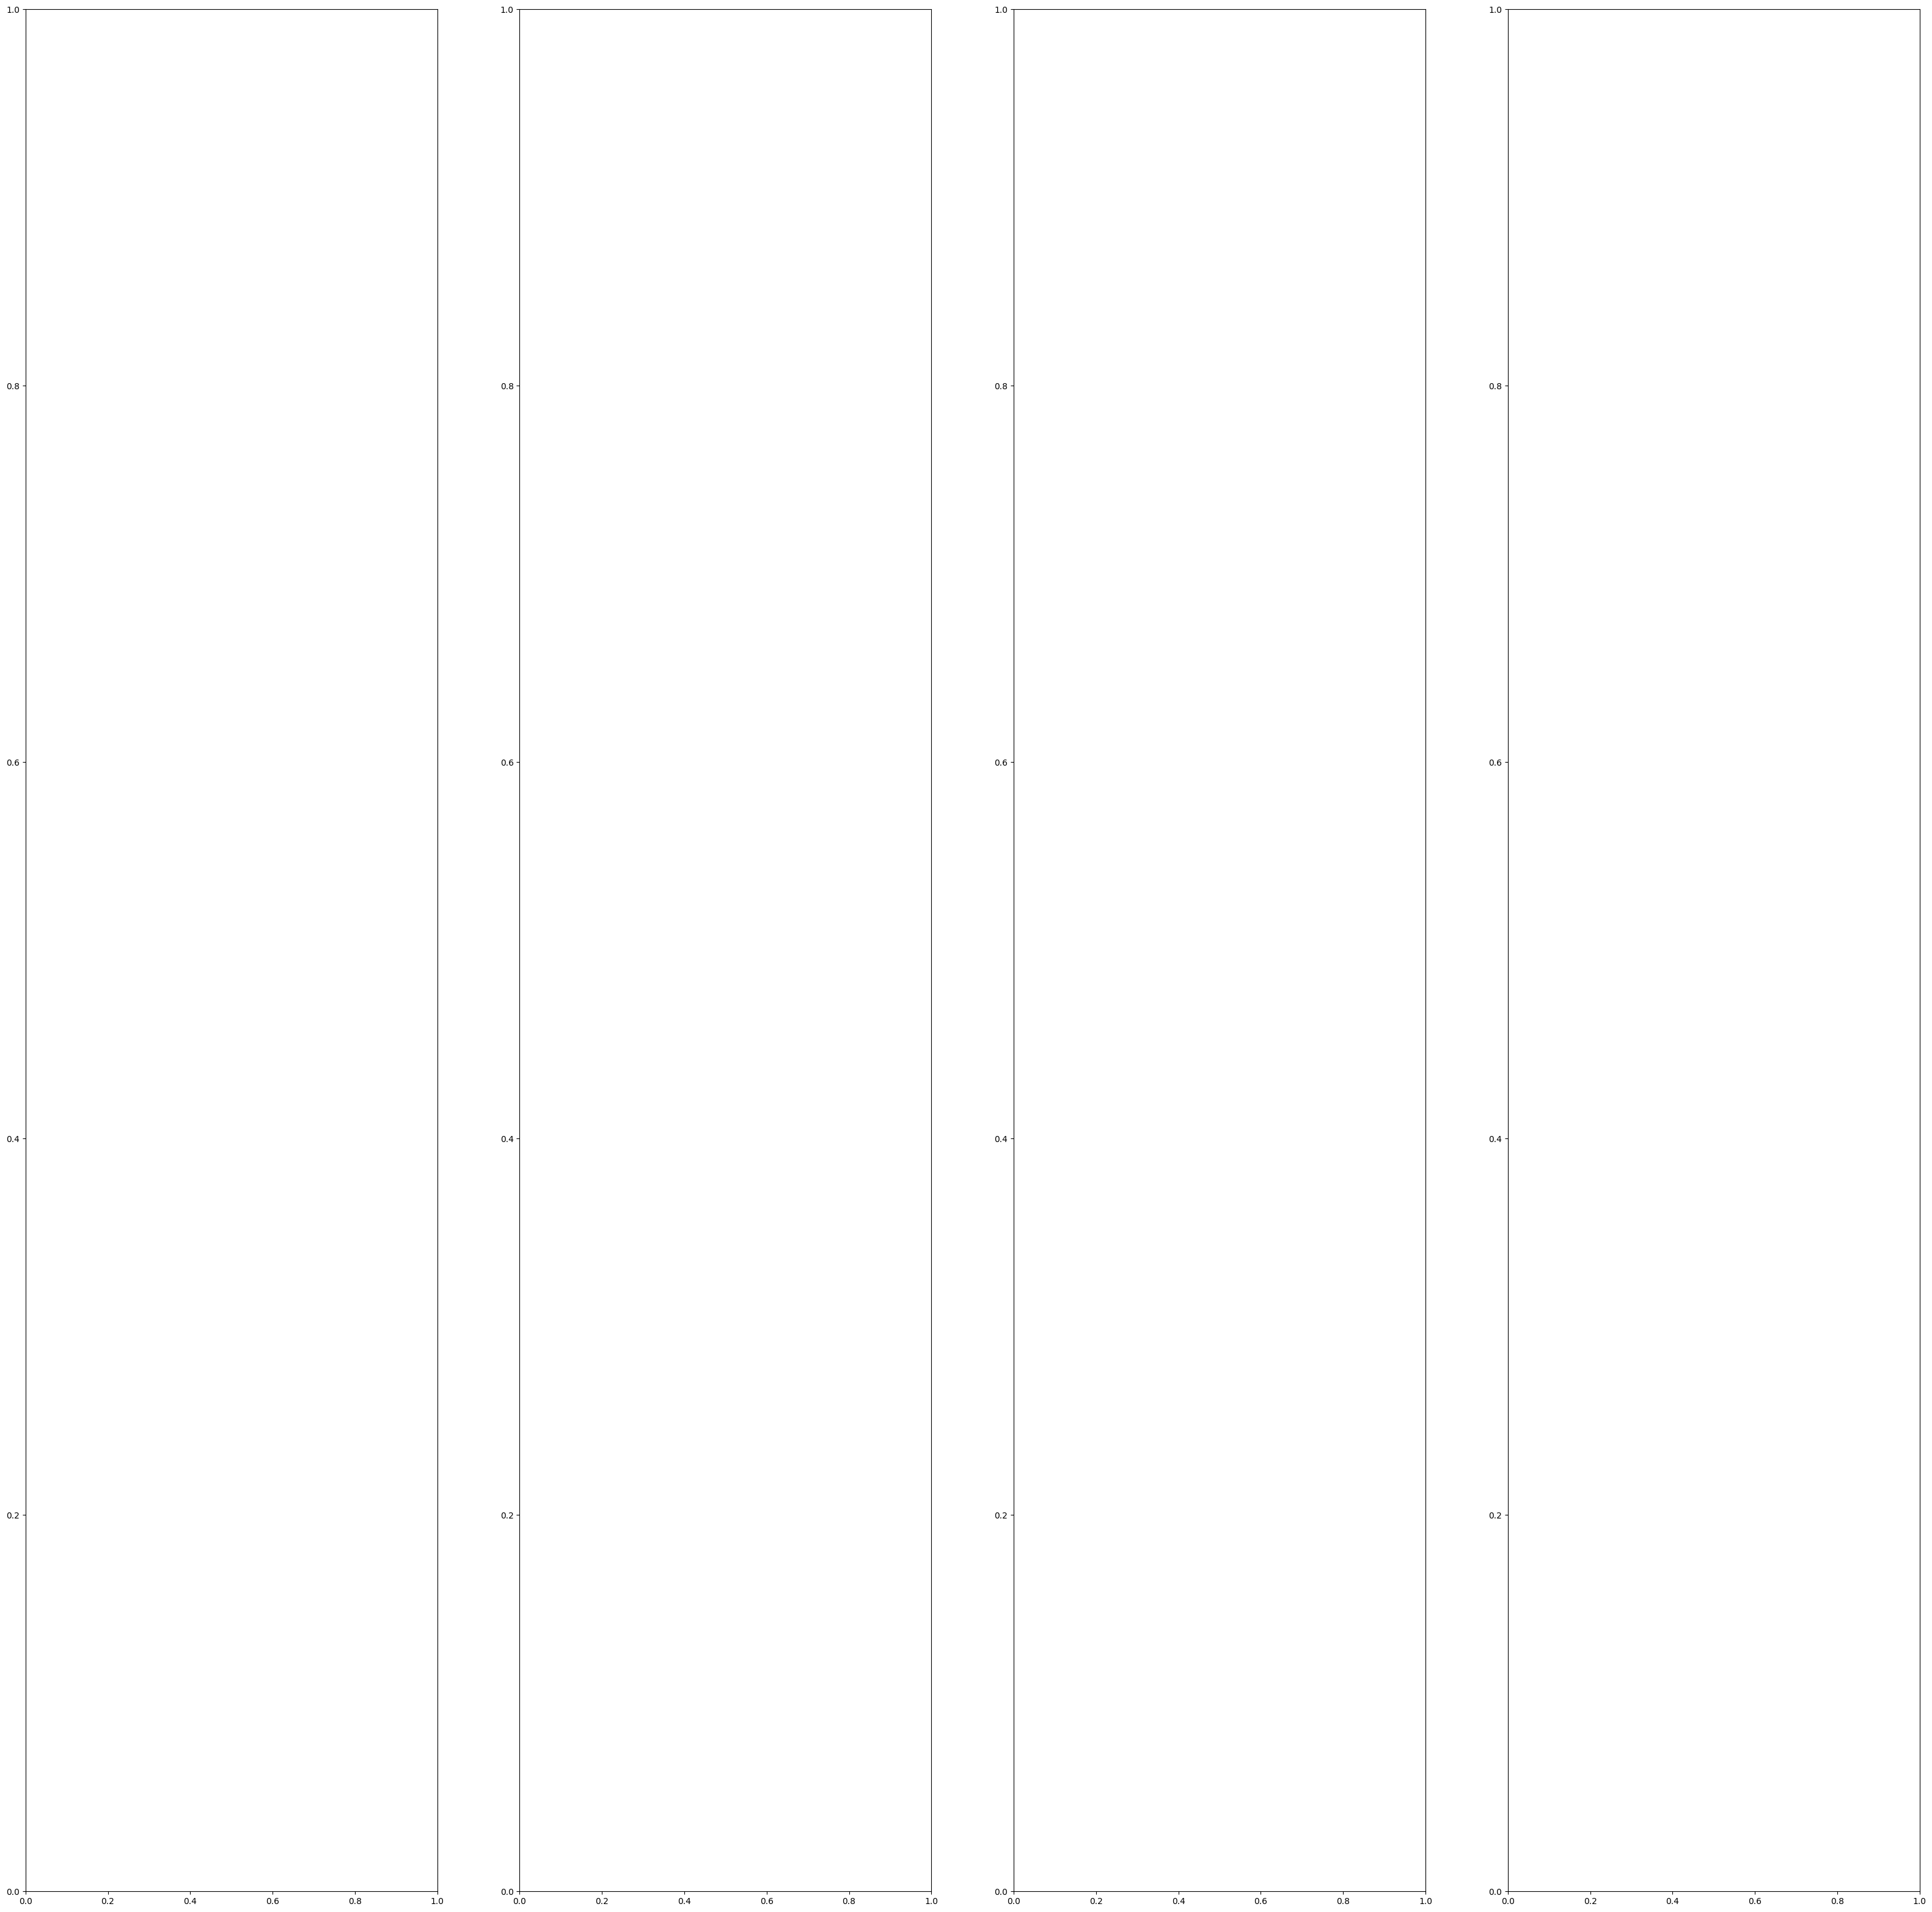

In [134]:
path = './data/train/'
fig, axis = plt.subplots(ncols = 4, figsize = (40, 40))
count = 0
for image in df.loc[:, 'filename'].head(16):
    img  = get_image(path, image)
    axis[count].imshow(int(img))
    count+=1


In [128]:
path = './data/train/'
print(get_image(path, df.loc[:, 'label'][0]))

None


In [132]:
df.loc[:, 'filename'][0]



'Image_1.jpg'

In [137]:
path = './data/train/'
img = cv.imread(os.path.join(path, 'Image_1.jpg'))
img.shape

(224, 224, 3)

In [141]:
df['images'] = [get_image(path ,img) for img in df.loc[:, 'filename']]

In [1]:
img_list =  [get_image(path ,img) for img in df.loc[:, 'filename']]
len(img_list)

NameError: name 'df' is not defined

In [147]:
df
final_df  = df.loc[:, ['images', 'face_on_card', 'number_on_card']]
final_df.head()

,images,face_on_card,number_on_card
0,"[[[244, 244, 244], [244, 244, 244], [248, 248,...",clubs,six
1,"[[[247, 255, 253], [247, 255, 254], [250, 254,...",hearts,queen
2,"[[[248, 255, 252], [248, 255, 252], [248, 255,...",diamonds,seven
3,"[[[251, 249, 249], [251, 249, 249], [250, 248,...",spades,six
4,"[[[255, 255, 255], [250, 248, 248], [244, 242,...",spades,eight


normalising the image matrix

In [153]:
df['images'] = df['images'].map(lambda x: x/255)

card face classifier

In [157]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['face_encoded'] = le.fit_transform(df['face_on_card'])


In [159]:
df['numbrt_encoded'] = le.fit_transform(df['number_on_card'])

In [160]:
df.head()

,filename,label,number_on_card,face_on_card,images,face_encoded,numbrt_encoded
0,Image_1.jpg,six of clubs,six,clubs,"[[[0.9568627450980393, 0.9568627450980393, 0.9...",0,10
1,Image_2.jpg,queen of hearts,queen,hearts,"[[[0.9686274509803922, 1.0, 0.9921568627450981...",2,8
2,Image_3.jpg,seven of diamonds,seven,diamonds,"[[[0.9725490196078431, 1.0, 0.9882352941176471...",1,9
3,Image_4.jpg,six of spades,six,spades,"[[[0.984313725490196, 0.9764705882352941, 0.97...",4,10
4,Image_5.jpg,eight of spades,eight,spades,"[[[1.0, 1.0, 1.0], [0.9803921568627451, 0.9725...",4,1


In [200]:
df.columns

Index(['filename', 'label', 'number_on_card', 'face_on_card', 'images',
       'face_encoded', 'numbrt_encoded'],
      dtype='object')

finding which LABEL IS ASSIGNEDT TO WHAT

In [206]:
df_label_face = df.loc[:, ['face_on_card', 'face_encoded']]
df_label_face.sort_values(by = 'face_encoded').drop_duplicates(subset = ['face_on_card'], keep = 'first')

,face_on_card,face_encoded
0,clubs,0
3416,diamonds,1
4532,hearts,2
2671,joker,3
4147,spades,4


In [ ]:
df_label_number = df.loc[:, ['face_on_card', 'numbrt_encoded']]
df_label_number.sort_values(by = 'numbrt_encoded').drop_duplicates(subset = ['number_on_card'], keep = 'first')

In [154]:
df['face_on_card'].values

array(['clubs', 'hearts', 'diamonds', ..., 'clubs', 'clubs', 'clubs'],
      dtype=object)

In [208]:
df['images'].shape

(4776,)

In [172]:
from sklearn.model_selection  import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df['images'], df['face_encoded'], test_size = 0.2)
train_x




940     [[[0.9921568627450981, 0.996078431372549, 0.98...
210     [[[1.0, 1.0, 1.0], [0.996078431372549, 0.99607...
1806    [[[0.45098039215686275, 0.38823529411764707, 0...
4065    [[[0.8509803921568627, 0.8588235294117647, 0.8...
4297    [[[0.9529411764705882, 0.9372549019607843, 0.9...
                              ...                        
677     [[[0.9176470588235294, 0.9058823529411765, 0.8...
1941    [[[0.9921568627450981, 0.9921568627450981, 0.9...
46      [[[0.09411764705882353, 0.09411764705882353, 0...
2317    [[[0.8941176470588236, 0.9176470588235294, 0.9...
1206    [[[1.0, 0.996078431372549, 0.996078431372549],...
Name: images, Length: 3820, dtype: object

In [175]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(3820,)
(3820,)
(956,)
(956,)


In [188]:
train_x_list  = train_x.to_list()
train_y_list = train_y.to_list()
test_x_list = test_x.to_list()
test_y_list = test_y.to_list()

In [182]:
train_x[100].shape

(224, 224, 3)

In [168]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

imports

In [179]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## model building.

discard

In [196]:
import random
idx = random.randint(0, len(train_x))
plt.imshow(train_x[idx, :])

KeyError: 'key of type tuple not found and not a MultiIndex'

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
ann.fit(train_x, train_y, epochs = 5)

cnn model

In [184]:
model = Sequential([
    Conv2D(32, (3,3), activation = "relu",input_shape =(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation = "relu"), 
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(4, activation = "sigmoid")
])

In [193]:
x_train_list = tf.convert_to_tensor(train_x, dtype=tf.int64)

y_train_list=tf.convert_to_tensor(train_y, dtype=tf.int64) 


ValueError: setting an array element with a sequence.

In [186]:
model.compile(loss = 'binary_Crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [189]:
model.fit(train_x_list, train_y_list, epochs = 5, batch_size=64)

ValueError: Failed to find data adapter that can handle input: (<class 'list'> containing values of types {"<class 'numpy.ndarray'>"}), (<class 'list'> containing values of types {"<class 'int'>"})